<a href="https://colab.research.google.com/github/pesfahanian/n-body_simulation/blob/master/n_body_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import random
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
iterations = 300
n = 5
G = 6.6743 * (10 ** -11)
scale = 10 ** 6
world_size = 100

In [91]:
masses = []
for i in range(n):
    masses.append(random.randint(1, 9) * scale)
print(masses)

[7000000, 7000000, 6000000, 6000000, 9000000]


In [92]:
# [[position], [forces_implied], [acceleration_vector], [velocity_vector]]
bodies = [[[0, 0] for i in range(n)],
          [[] for i in range(n)],
          [[0, 0] for i in range(n)],
          [[0, 0] for i in range(n)]]

for i in range(n):
    bodies[0][i][0] = random.randint(1, world_size)
    bodies[0][i][1] = random.randint(1, world_size)

for line in bodies:
    print(line)

[[31, 96], [4, 62], [17, 99], [73, 21], [21, 39]]
[[], [], [], [], []]
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]


In [0]:
def distance(a, b):
    return math.sqrt((abs(bodies[0][a][0]-bodies[0][b][0])) + (abs(bodies[0][a][1]-bodies[0][b][1])))

In [0]:
def force(a, b):
    return ((G * masses[a] * masses[b]) / math.sqrt(2) * distance(a, b) ** 2)

In [0]:
def update_force_implied():
    forces = [[] for i in range(n)]
    for i in range(0, n):
        for j in range(0, n):
            if(i != j):
                # print(i, j)
                if((bodies[0][j][0] - bodies[0][i][0])>0 and (bodies[0][j][1] - bodies[0][i][1])>0):
                    forces[i].append([force(i, j), force(i, j)])

                if((bodies[0][j][0] - bodies[0][i][0])>0 and (bodies[0][j][1] - bodies[0][i][1])<0):
                    forces[i].append([force(i, j), -force(i, j)])

                if((bodies[0][j][0] - bodies[0][i][0])<0 and (bodies[0][j][1] - bodies[0][i][1])>0):
                    forces[i].append([-force(i, j), force(i, j)])

                if((bodies[0][j][0] - bodies[0][i][0])<0 and (bodies[0][j][1] - bodies[0][i][1])<0):
                    forces[i].append([-force(i, j), -force(i, j)])
    bodies[1] = forces.copy()
    # for line in bodies[1]:
    #     print(line)
    # print(len(bodies[1]))

In [0]:
def update_acceleration_vector():
    for i in range(0, n):
        sum_forces_x = 0
        sum_forces_y = 0
        for force in bodies[1][i]:
            # print(force)
            sum_forces_x = sum_forces_x + force[0]
            sum_forces_y = sum_forces_y + force[1]
        bodies[2][i][0] = sum_forces_x / masses[i]
        bodies[2][i][1] = sum_forces_y / masses[i]
    # print(bodies[2])

In [0]:
def update_velocity_vector():
    for i in range(0, n):
        velocity_x = bodies[2][i][0] + bodies[3][i][0]
        velocity_y = bodies[2][i][1] + bodies[3][i][1]
        bodies[3][i][0] = velocity_x
        bodies[3][i][1] = velocity_y

In [0]:
def update_position():
    for i in range(0, n):
        position_x = 0.5*(bodies[2][i][0]) + bodies[3][i][0] + bodies[0][i][0]
        position_y = 0.5*(bodies[2][i][1]) + bodies[3][i][1] + bodies[0][i][1]
        bodies[0][i][0] = position_x
        bodies[0][i][1] = position_y

In [99]:
for line in bodies:
    print(line)

[[31, 96], [4, 62], [17, 99], [73, 21], [21, 39]]
[[], [], [], [], []]
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


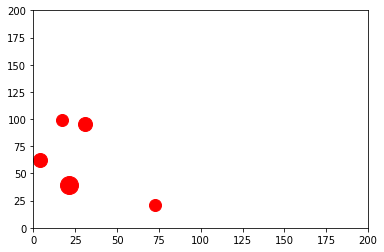

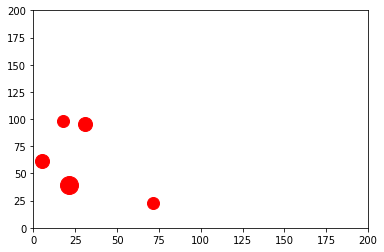

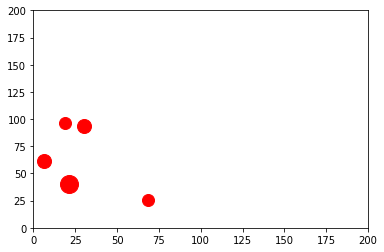

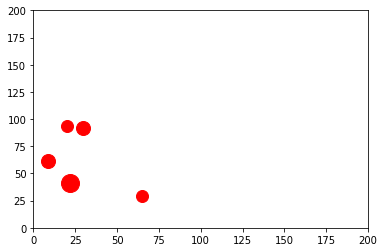

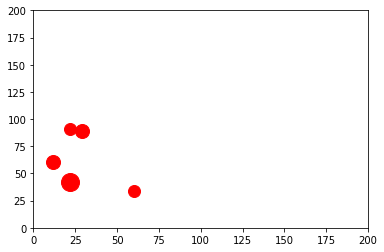

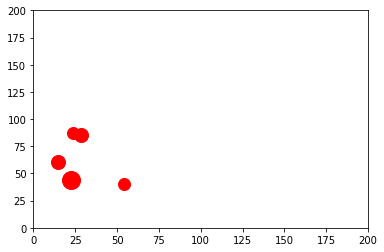

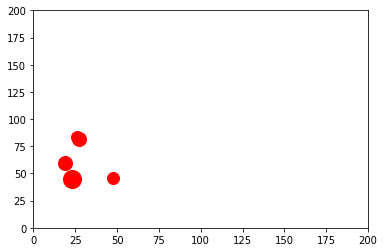

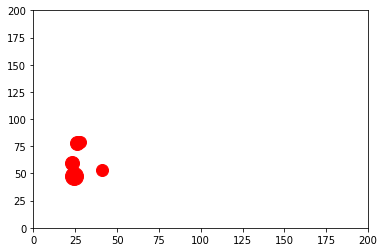

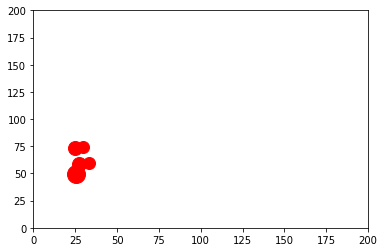

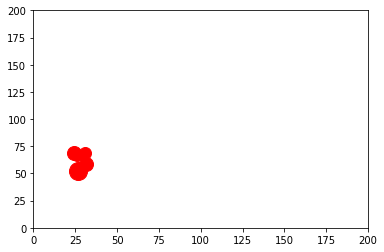

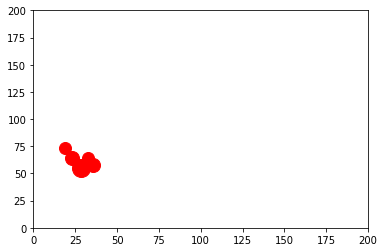

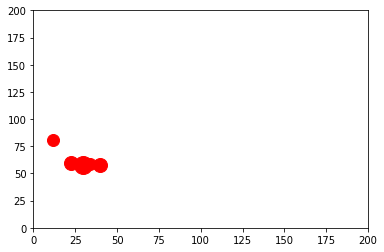

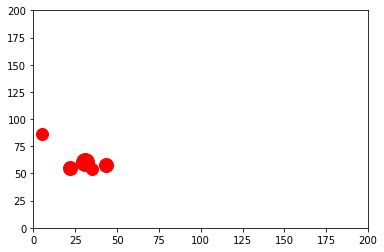

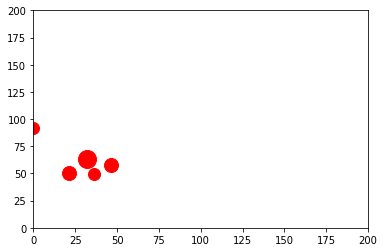

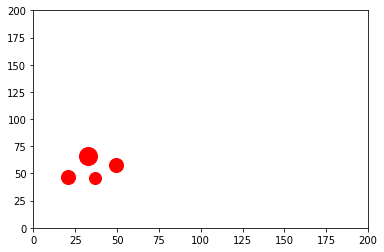

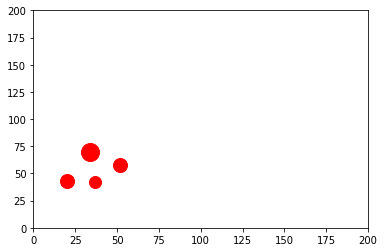

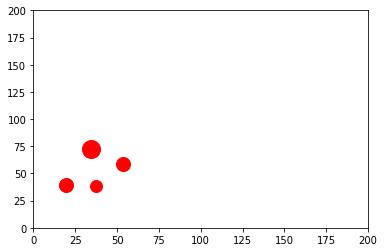

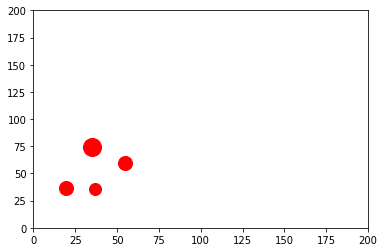

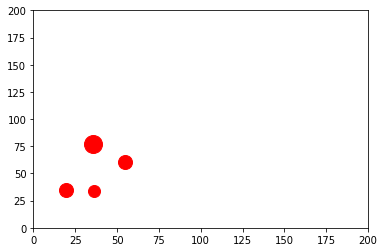

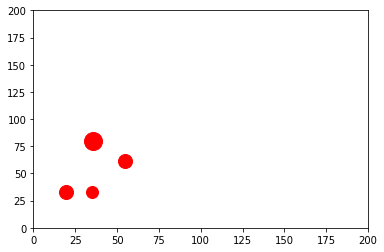

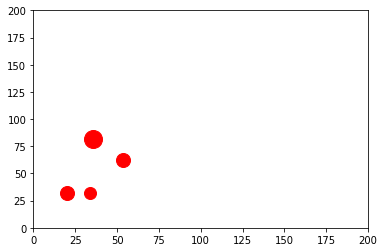

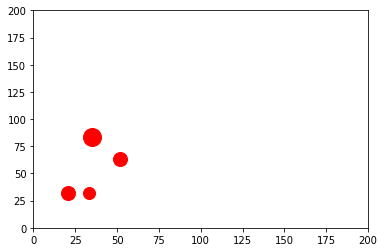

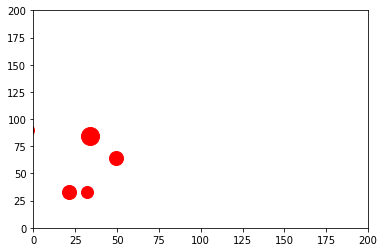

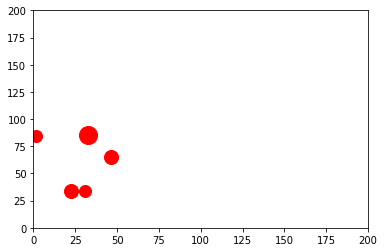

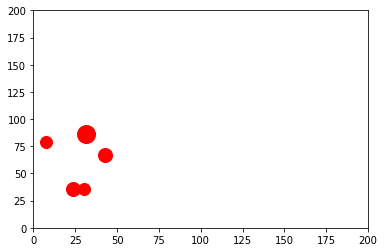

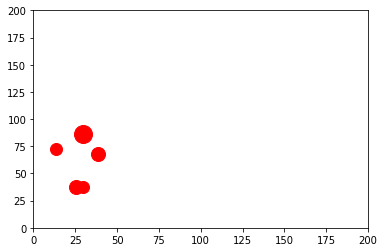

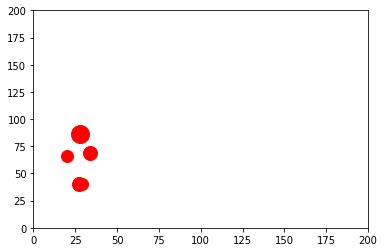

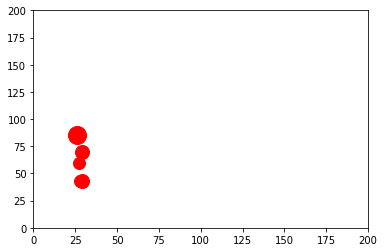

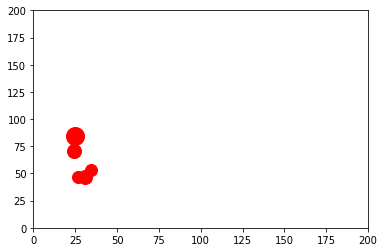

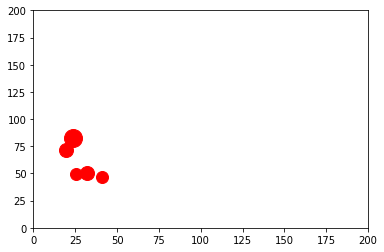

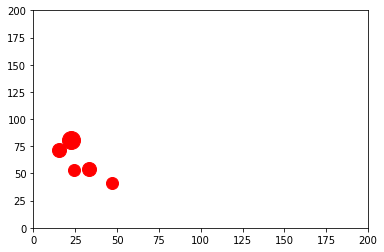

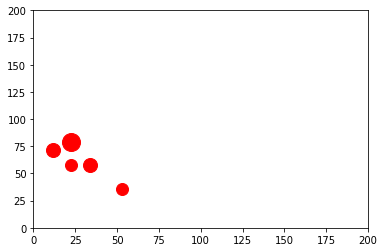

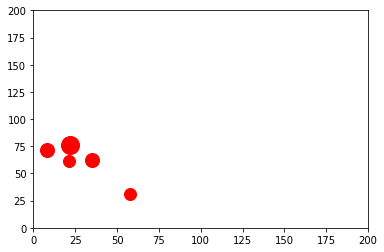

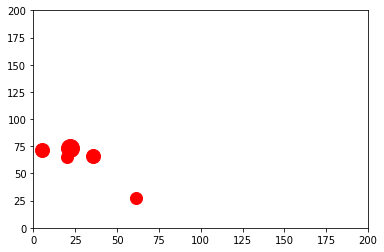

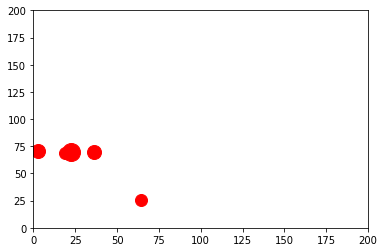

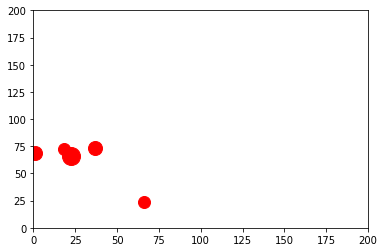

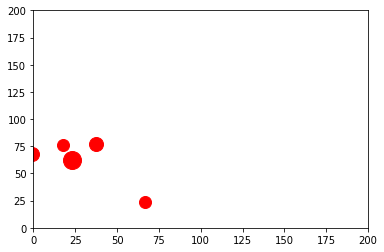

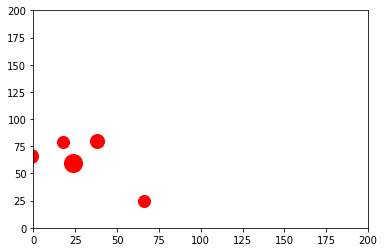

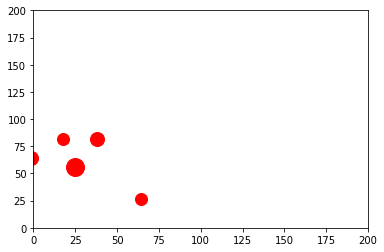

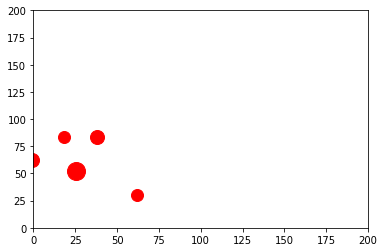

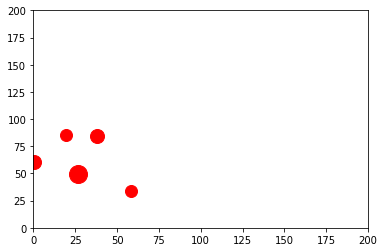

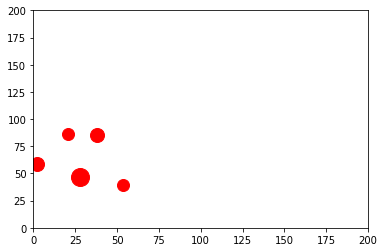

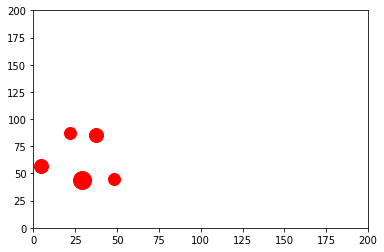

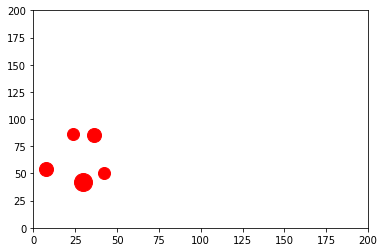

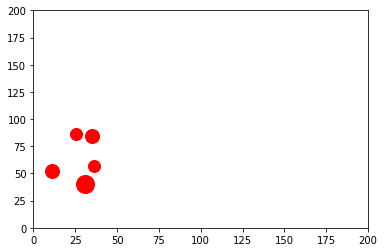

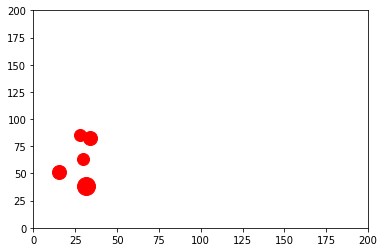

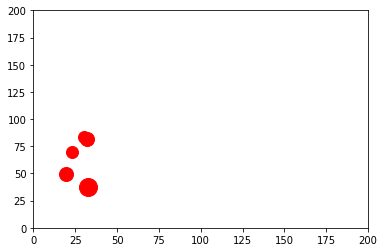

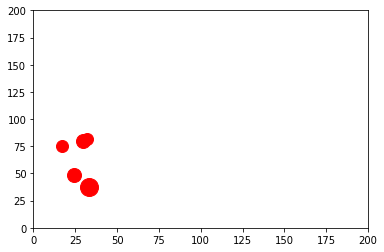

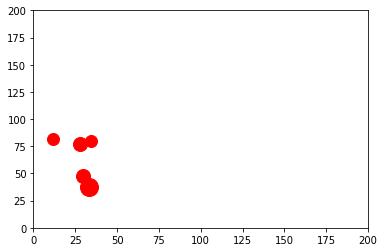

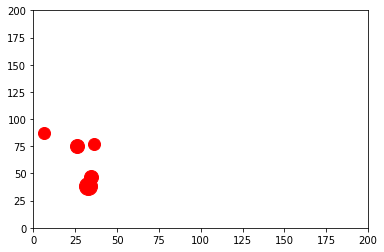

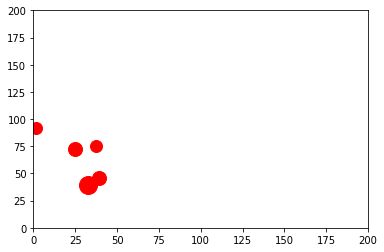

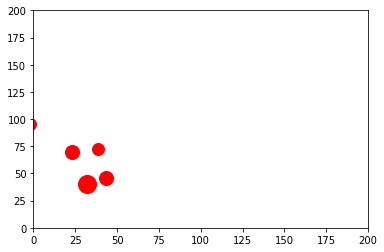

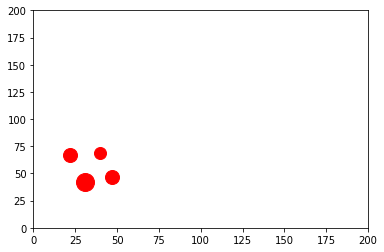

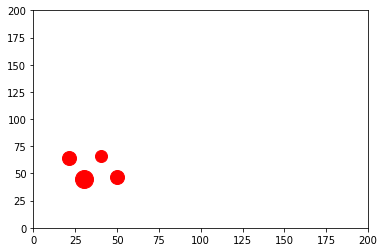

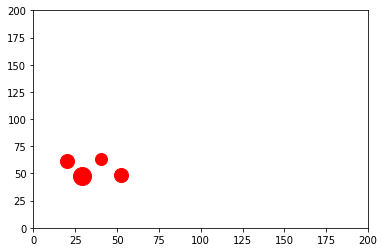

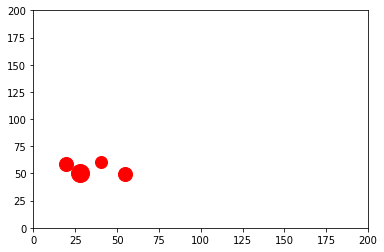

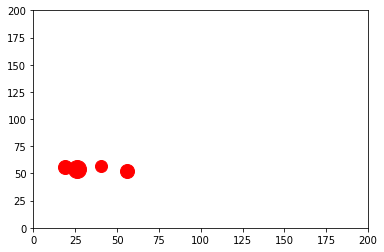

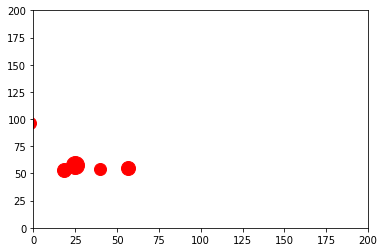

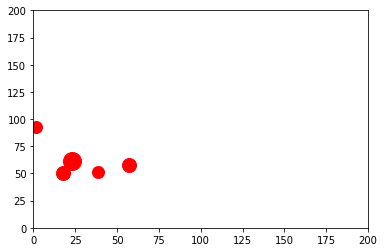

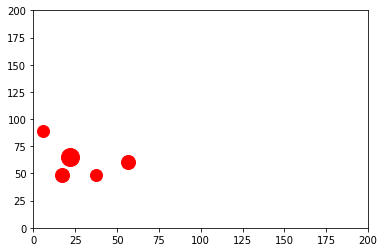

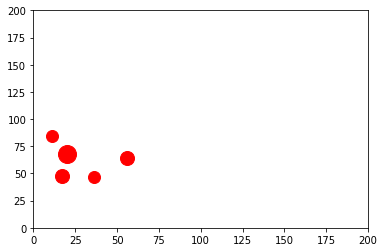

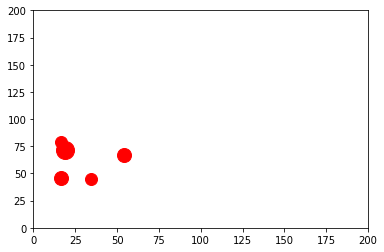

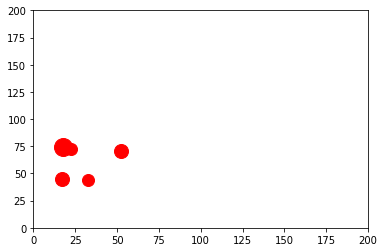

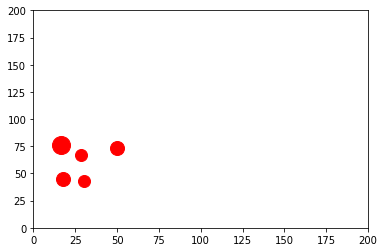

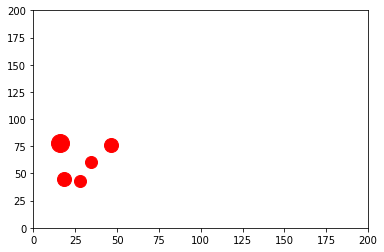

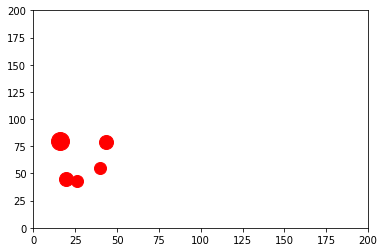

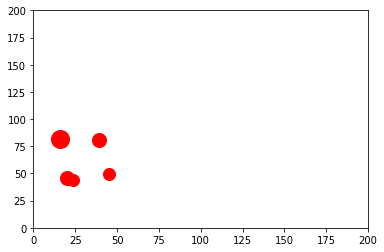

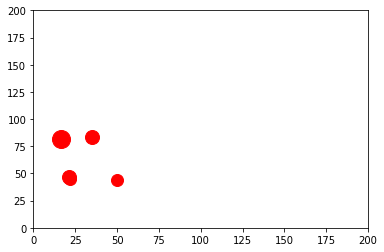

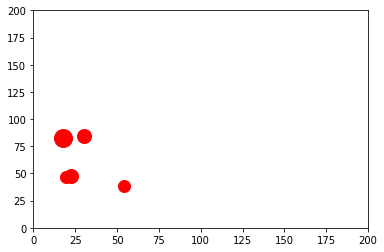

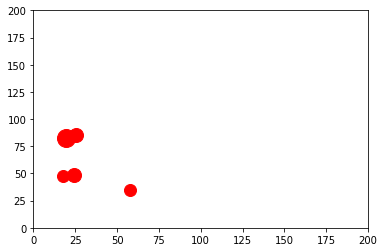

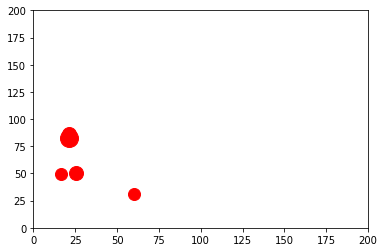

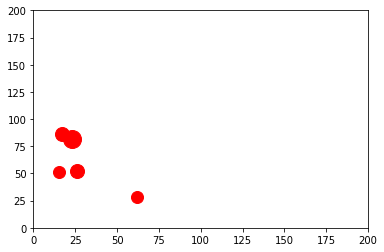

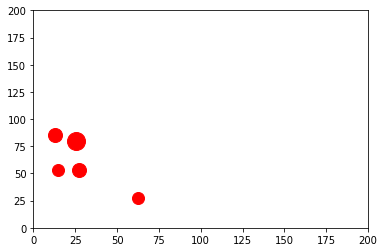

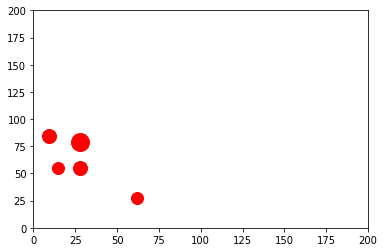

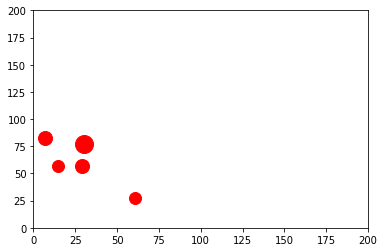

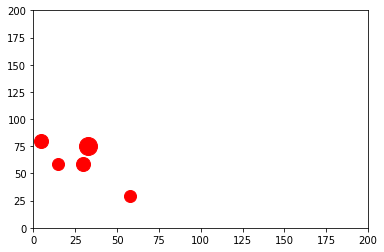

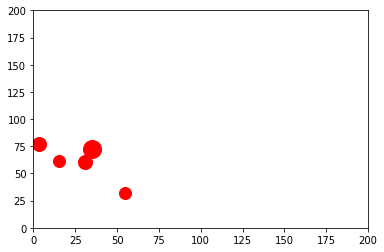

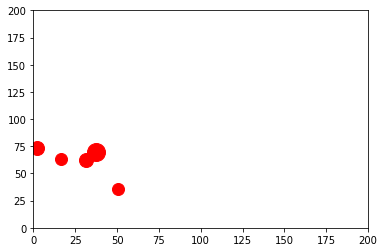

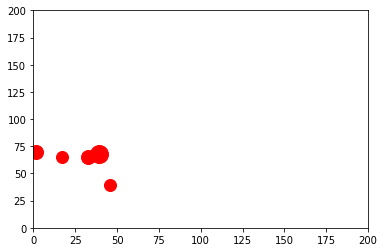

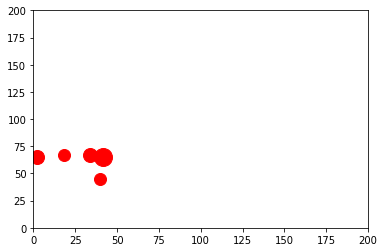

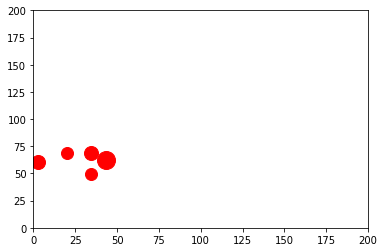

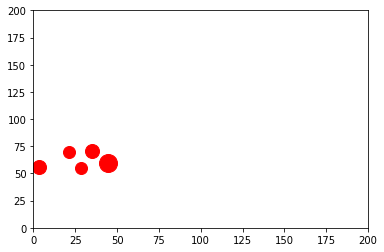

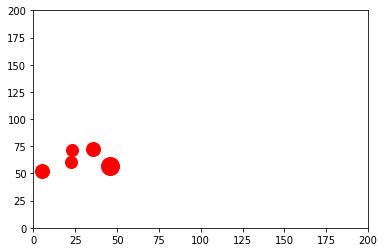

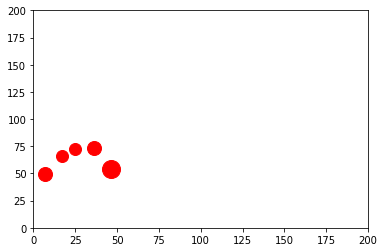

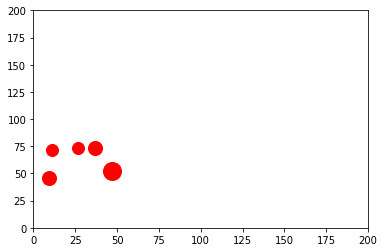

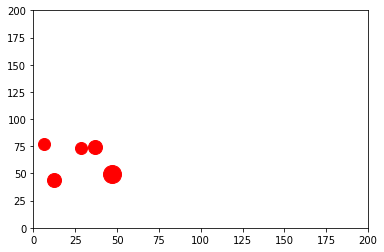

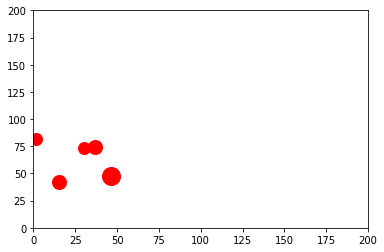

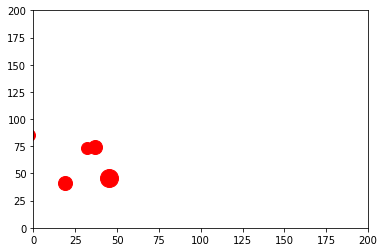

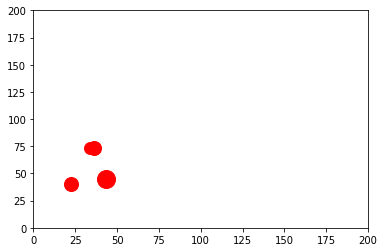

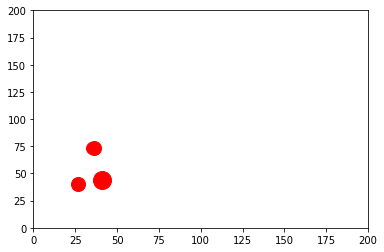

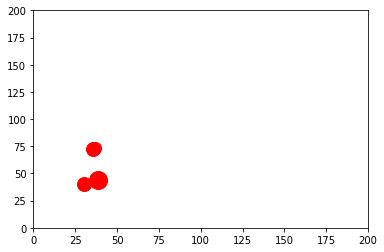

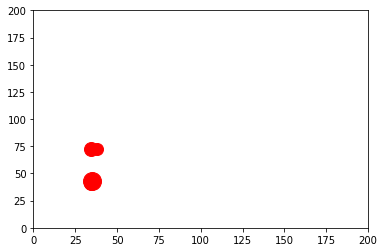

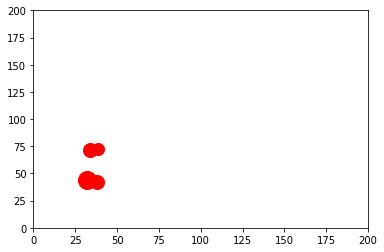

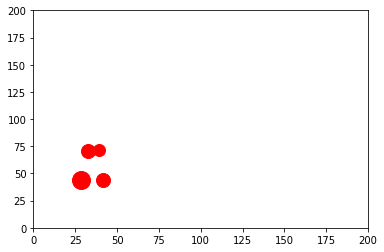

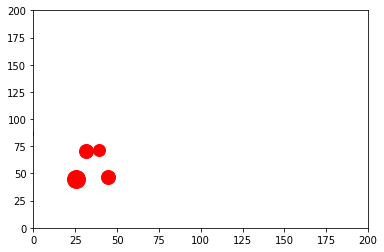

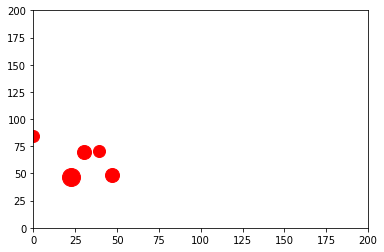

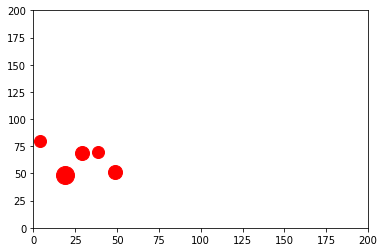

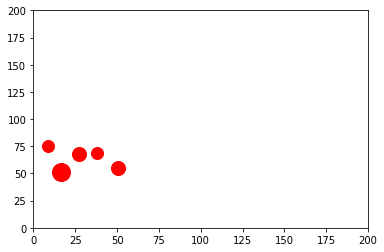

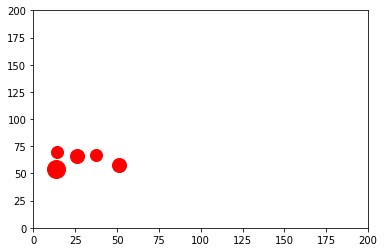

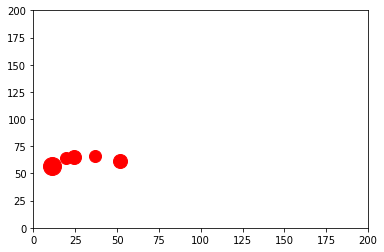

In [100]:
update_force_implied()
update_acceleration_vector()
for i in range(iterations):
    # # print(bodies[0])
    # for line in bodies:
    #     print(line)
    update_velocity_vector()
    update_position()
    update_force_implied()
    update_acceleration_vector()
    # how often to plot
    if(i%3 == 0):
        plt.figure()
        for i in range(n):
            plt.plot(bodies[0][i][0], bodies[0][i][1], 'ro', markersize = masses[i]*2/scale)
        ax = plt.gca()
        ax.set_xlim([0, 2*world_size])
        ax.set_ylim([0, 2*world_size])
    # print('------------------------------------------------------------------------------------------------------------------------------')